In [1]:
import sys, os
sys.path.append(os.path.abspath("."))
sys.path.append(os.path.abspath(".."))
from yahoo_data.services.get_ta_indicators import GenerateTechnicalIndicators
from yahoo_data.services.get_pca import GeneratePCAByGrouping
from data_analysis.useful_defaults import GROUPS
technical_indicators_petr4_df = GenerateTechnicalIndicators(
    'PETR4.SA',
    '2015-01-01',
    '2020-01-01'
).run_with_default_params()
technical_indicators_petr4_df = technical_indicators_petr4_df.dropna()
from yahoo_data.services.get_pca import GeneratePCAByGrouping

groups = GROUPS

from data_analysis.services.stock_preprocessor import StockPreprocessor

petr4_1_days = StockPreprocessor.preprocess(
    'PETR4.SA',
    '2015-01-01',
    'Close',
    1,
    '2020-01-01'
)
petr4_3_days = StockPreprocessor.preprocess(
    'PETR4.SA',
    '2015-01-01',
    'Close',
    3,
    '2020-01-01'
)
petr4_5_days = StockPreprocessor.preprocess(
    'PETR4.SA',
    '2015-01-01',
    'Close',
    5,
    '2020-01-01'
)



Mean Absolute Error: 0.02
Mean Absolute Error / Média 9.3

RMSE:  0.032
Média do resultado financeiro: 0.00247


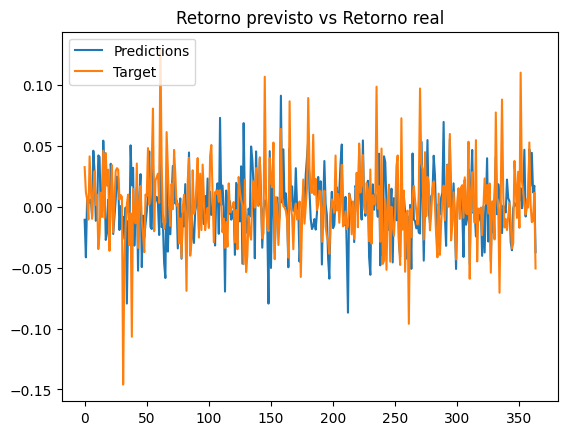

% Acerto de tendencia: 0.6703296703296703


In [2]:
from data_analysis.services.random_forests import RandomForestsWrapper
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

np.random.seed(31415) 

instance = RandomForestsWrapper()
results = RandomForestsWrapper().run(petr4_1_days, 'Close PnL 1 days')
predictions = results['predictions']
errors = results['errors']
test_target = results['test_target']

print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Mean Absolute Error / Média', round(np.mean(errors)/np.mean(test_target), 2))
# Predicting the target values of the test set

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(test_target, predictions)), '.3f'))
print("\nRMSE: ", rmse)

print("Média do resultado financeiro:", round(np.mean(test_target), 5))
# print("RMSE/Média", round(rmse/np.mean(test_target), 5))


plt.plot(predictions, label='Predictions')
plt.plot(test_target, label='Target')
plt.legend(loc="upper left")
plt.title('Retorno previsto vs Retorno real')
plt.show()

direction_count = 0
for index in range(len(predictions)):
    if predictions[index] > 0 and test_target[index] > 0:
        direction_count += 1
    if predictions[index] < 0 and test_target[index] < 0:
        direction_count += 1

print(f'% Acerto de tendencia: {direction_count/len(predictions)}')

Mean Absolute Error: 0.03
Mean Absolute Error / Média 4.37

RMSE:  0.046
Média do resultado financeiro: 0.0076


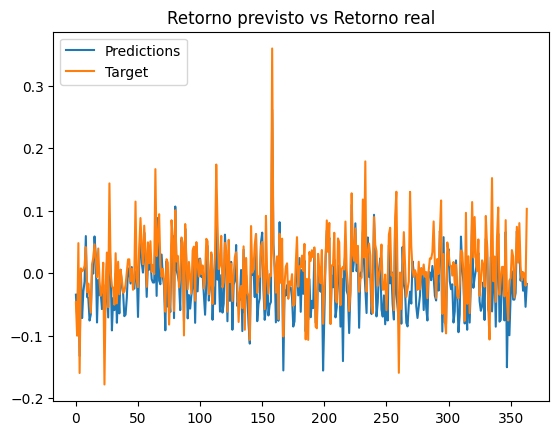

% Acerto de tendencia: 0.739010989010989


In [3]:
from data_analysis.services.random_forests import RandomForestsWrapper
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

np.random.seed(31415) 

instance = RandomForestsWrapper()
results = RandomForestsWrapper().run(petr4_3_days, 'Close PnL 3 days')
predictions = results['predictions']
errors = results['errors']
test_target = results['test_target']

print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Mean Absolute Error / Média', round(np.mean(errors)/np.mean(test_target), 2))
# Predicting the target values of the test set

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(test_target, predictions)), '.3f'))
print("\nRMSE: ", rmse)

print("Média do resultado financeiro:", round(np.mean(test_target), 5))
# print("RMSE/Média", round(rmse/np.mean(test_target), 5))


plt.plot(predictions, label='Predictions')
plt.plot(test_target, label='Target')
plt.legend(loc="upper left")
plt.title('Retorno previsto vs Retorno real')
plt.show()

direction_count = 0
for index in range(len(predictions)):
    if predictions[index] > 0 and test_target[index] > 0:
        direction_count += 1
    if predictions[index] < 0 and test_target[index] < 0:
        direction_count += 1

print(f'% Acerto de tendencia: {direction_count/len(predictions)}')

Mean Absolute Error: 0.03
Mean Absolute Error / Média 3.74

RMSE:  0.048
Média do resultado financeiro: 0.00872


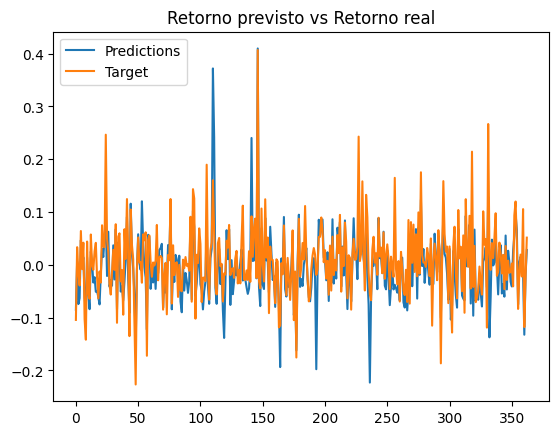

% Acerto de tendencia: 0.8181818181818182


In [4]:
from data_analysis.services.random_forests import RandomForestsWrapper
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error

np.random.seed(31415) 

instance = RandomForestsWrapper()
results = RandomForestsWrapper().run(petr4_5_days, 'Close PnL 5 days')
predictions = results['predictions']
errors = results['errors']
test_target = results['test_target']

print('Mean Absolute Error:', round(np.mean(errors), 2))
print('Mean Absolute Error / Média', round(np.mean(errors)/np.mean(test_target), 2))
# Predicting the target values of the test set

# RMSE (Root Mean Square Error)
rmse = float(format(np.sqrt(mean_squared_error(test_target, predictions)), '.3f'))
print("\nRMSE: ", rmse)

print("Média do resultado financeiro:", round(np.mean(test_target), 5))
# print("RMSE/Média", round(rmse/np.mean(test_target), 5))


plt.plot(predictions, label='Predictions')
plt.plot(test_target, label='Target')
plt.legend(loc="upper left")
plt.title('Retorno previsto vs Retorno real')
plt.show()

direction_count = 0
for index in range(len(predictions)):
    if predictions[index] > 0 and test_target[index] > 0:
        direction_count += 1
    if predictions[index] < 0 and test_target[index] < 0:
        direction_count += 1

print(f'% Acerto de tendencia: {direction_count/len(predictions)}')

**TESTES COM OTIMIZAÇÃO DE PORTFÓLIO**

In [1]:
import sys, os
sys.path.append(os.path.abspath("."))
sys.path.append(os.path.abspath(".."))
from portfolio_management.services.scipy_optimizator import SciPyOptimizator
from data_analysis.services import RandomForestsWrapper, StockPreprocessor
import pandas as pd
import numpy as np
stocks = [
    'PETR4.SA',
    'WEGE3.SA', 
    'ITUB4.SA', 
    'VALE3.SA', 
    'B3SA3.SA', 
    'BEEF3.SA',
    # 'BPAC11.SA',
    'CYRE3.SA',
    'ELET3.SA',
    'FLRY3.SA',
    'MGLU3.SA',
    # 'VIIA3.SA',
    'KLBN11.SA',
    'RENT3.SA',
    # 'RAIL3.SA'
    ]
price_column = 'Close'
df_list = []
price_dfs = []
for stock in stocks:
    preprocessed_stock = StockPreprocessor.preprocess(
        stock,
        '2015-01-01',
        price_column,
        5,
        '2020-01-01'
    )
    predicted_stock = RandomForestsWrapper().run(preprocessed_stock, 'Close PnL 5 days', price_column)
    predictions = predicted_stock['predictions']
    test_target = predicted_stock['test_target']

    data = {'Predictions': predictions, 'Actual': test_target}
    direction_count = 0
    for index in range(len(predictions)):
        if predictions[index] > 0 and test_target[index] > 0:
            direction_count += 1
        if predictions[index] < 0 and test_target[index] < 0:
            direction_count += 1
            
    # print(f'% Acerto de tendencia {stock}: {direction_count/len(predictions)}')
    actual_vs_predicted_df = pd.DataFrame(data)
    df_list.append(actual_vs_predicted_df)
    price_dfs.append(predicted_stock['price_data'])
    print(f'{stock} final variance')
    print(np.sqrt(np.array(predicted_stock['price_data'].var() * 252)[0]))


PETR4.SA final variance
43.82315735071778
WEGE3.SA final variance
35.73697284600379
ITUB4.SA final variance
109.42126901139973
VALE3.SA final variance
171.95619040632087
B3SA3.SA final variance
47.50189265258937
BEEF3.SA final variance
27.678329720809128
CYRE3.SA final variance
65.33000035536746
ELET3.SA final variance
139.80181662567998
FLRY3.SA final variance
97.72958613028224
MGLU3.SA final variance
47.857012626845616
KLBN11.SA final variance
25.216998034485233
RENT3.SA final variance
168.46819135546556


In [2]:
SciPyOptimizator().optimize(
    price_dfs=price_dfs,
    dfs=df_list, 
    tickers=stocks, 
    price_column=price_column,
    desired_risk=12
)

VARIANCE ARRAY 0.33066192847531
VARIANCE ARRAY 0.5714285715653248
VARIANCE ARRAY 0.44012888912587694
VARIANCE ARRAY 0.5714285719912192
VARIANCE ARRAY 0.5714285748450728
VARIANCE ARRAY 0.5714285666348762
VARIANCE ARRAY 0.44734150796652306
VARIANCE ARRAY 0.26917338150979264
VARIANCE ARRAY 0.5714285714013041
VARIANCE ARRAY 0.4536464758441337
VARIANCE ARRAY 0.45655330096869196
VARIANCE ARRAY 0.45874656718629725
VARIANCE ARRAY 0.46027155835120154
VARIANCE ARRAY 0.571428570982831
VARIANCE ARRAY 0.46370837470420156
VARIANCE ARRAY 0.4669016258799306
VARIANCE ARRAY 0.47104277627243457
VARIANCE ARRAY 0.4748082884367844
VARIANCE ARRAY 0.47910934617123985
VARIANCE ARRAY 0.5714285715839058
VARIANCE ARRAY 0.4908671909145594
VARIANCE ARRAY 0.5714285758952546
VARIANCE ARRAY 0.5714285724925604
VARIANCE ARRAY 0.5714285694080623
VARIANCE ARRAY 0.5714285629565863
VARIANCE ARRAY 0.5220689539362479
VARIANCE ARRAY 0.5714285647447592
VARIANCE ARRAY 0.5291627242469592
VARIANCE ARRAY 0.5714285503608623
VARIANCE

c:\Users\ehbat\anaconda3\envs\tcc\Lib\site-packages\cvxpy\problems\problem.py:1387: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(


VARIANCE ARRAY 0.571428575553596
VARIANCE ARRAY 0.5714285897158383
VARIANCE ARRAY 0.5714285771692331
VARIANCE ARRAY 0.5714285719529983
VARIANCE ARRAY 0.5029982718869309
VARIANCE ARRAY 0.5714285810463249
VARIANCE ARRAY 0.5714285720336788
VARIANCE ARRAY 0.5714285731365283
VARIANCE ARRAY 0.5714285720316097
VARIANCE ARRAY 0.5714285829024006
VARIANCE ARRAY 0.5714286060244023
VARIANCE ARRAY 0.5714285754695984
VARIANCE ARRAY 0.5714285745694069
VARIANCE ARRAY 0.5714285760227926
VARIANCE ARRAY 0.5714285749091033
VARIANCE ARRAY 0.5714285749681418
VARIANCE ARRAY 0.5714285865796809
VARIANCE ARRAY 0.5714285766437452
VARIANCE ARRAY 0.5714285731870703
VARIANCE ARRAY 0.5714285721639858
VARIANCE ARRAY 0.5714286058999091
VARIANCE ARRAY 0.5714285743064546
VARIANCE ARRAY 0.571428580888577
VARIANCE ARRAY 0.571428575606583
VARIANCE ARRAY 0.5714285974374921
VARIANCE ARRAY 0.5714285752954028
VARIANCE ARRAY 0.5714285742801835
VARIANCE ARRAY 0.5714285906608495
VARIANCE ARRAY 0.5714286051303332
VARIANCE ARRAY 0.